In [5]:
%pip install torch torchvision torchsummary
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import json
import os
from MiraBest_Goof import MiraBest

Note: you may need to restart the kernel to use updated packages.


In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5],[0.5])])

trainset = MiraBest(root='../batches', train=True, download=True, transform=transform)  
batch_size_train = 2
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True, num_workers=2)

Files already downloaded and verified


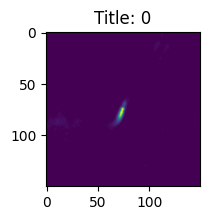

In [52]:
x = []
y = []
count = 0
for i, data in enumerate(trainset, 0):
    images, labels = data
    fig = plt.figure(figsize=(2, 2))
    plt.imshow(images[0])
    plt.title("Title: {}".format(labels))
    plt.show()
    break;